# LCF Analysis
This example covers:
1. Read processed data
3. LCF of standard to experimental data
4. Saving processed data

## Resources
Pyhon modules and libraries used in this example

In [1]:
# code for importing custom helper libraries
import sys
# moved all custom helper libraries to a level bellow this directory.
sys.path.append('../lib/')

# Library with the functions that provide the larch functionalities
# equivalent to those provided by athena including normalisation, 
# merging, re-binning, LCF and visualisation (plotting)
import manage_athena as athenamgr 

# additional custom plot functions (replicate plots in published papers)
import custom_plots

# File handling
from pathlib import Path

# Handling json files
import json

# printing formated json data
import pprint

# to copy the mutable types like dictionaries, use copy/deepcopy 
import copy

#plotting library
import matplotlib.pyplot as plt
# inline: shows plot in notebook
# tk: shows plot in popup
%matplotlib inline 

# 1. Read data

The process is divided in two steps. The first step entails reading the metadata which indicates the location of the data and some additional parameters such as  group names and file mappings. The second step uses this metadata to retrieve the experimental results from the files indicated in the metadata.

## 1.1 Data mappings
Variables used for mapping processed data to results in paper. In this case these data are for figure 4A. The mappings are stored in a json file which was produced in the previous step named "PtSn_KEdge_XANES.json".


In [2]:
json_file = "./mappings_metadata.json"
json_metadata = {}

with open(json_file) as json_data:
    json_metadata = json.load(json_data)

pprint.pprint(json_metadata)

json_file = "operations_metadata.json"
operations_data = {}
print("*"*80)
with open(json_file) as json_data:
    operations_data = json.load(json_data)
    
pprint.pprint(operations_data)

{'data_file': 'Xray_data.zip',
 'data_mapping': [{'data_path': '../outputs/PtSn_KEdge',
                   'data_type': 'athena',
                   'file_mappings': [{'file_name': 'PtSn_KEdge_xanes.prj',
                                      'group': 'PtSn',
                                      'group_name': 'PtSn'},
                                     {'file_name': 'PtSn_KEdge_xanes.prj',
                                      'group': 'Air',
                                      'group_name': 'Air'},
                                     {'file_name': 'PtSn_KEdge_xanes.prj',
                                      'group': 'Ar',
                                      'group_name': 'Ar'},
                                     {'file_name': 'PtSn_KEdge_xanes.prj',
                                      'group': 'H2',
                                      'group_name': 'H2'},
                                     {'file_name': 'PtSn_KEdge_xanes.prj',
                                      'gr

## 1.2 Read processed data

The process below reads the data from the output file generated in the previous step and collects the groups in a dictionary for further processing and analysis

In [3]:
snkedge_data={}

for a_set in json_metadata["data_mapping"]:
    project_path = Path(a_set["data_path"])
    for a_mapping in a_set["file_mappings"]:    # project file name
        project_name = a_mapping['file_name']
        # name assigned to the readings for processing and display
        data_group =  a_mapping['group']    
        # the group names use underscores instead of spaces and periods 
        # in athena file
        group_name =  a_mapping['group_name']
        # read each group from the corresponding project file
        athena_project = athenamgr.read_project(Path(project_path,project_name))

        snkedge_data[data_group] = athenamgr.get_group(athena_project, group_name)


Just to check we plot the data collected so far 

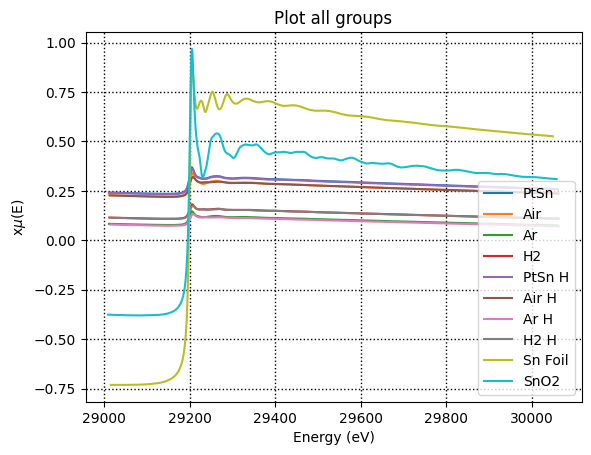

In [4]:
for a_group in snkedge_data:
   plt = athenamgr.plot_mu(snkedge_data[a_group])

plt.title("Plot all groups")
plt.show()

# 3. LCF Analysis

<Figure size 800x200 with 0 Axes>

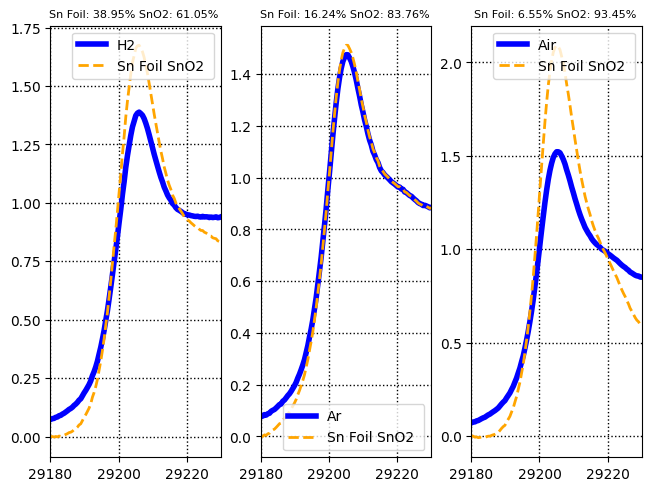

Goodness of LCF fits (R factors)
LCF of H2 R Factor:	 0.0010
LCF of Ar R Factor:	 0.0011
LCF of Air R Factor:	 0.0003


In [5]:
# get parameters for the first lcf operation

reference_standard = operations_data['task_list'][0]['variables']["reference_standard"]

lcf_component_names = operations_data['task_list'][0]['variables']['lcf_components']
lcf_group_names = operations_data['task_list'][0]['variables']['lcf_groups']

lower_limit = operations_data['task_list'][0]['variables']['lower_limit']
upper_limit = operations_data['task_list'][0]['variables']['upper_limit']


# Create a List of groups to use as components 
lcf_components = {}
for a_component in lcf_component_names :
    lcf_components[a_component] = snkedge_data[a_component]

#create a list of groups to hold the results of the lcf                          
results = []

# do lcf on each of the groups listed
for a_group in lcf_group_names:
    min_lim = lcf_components[reference_standard].e0 + lower_limit
    max_lim = lcf_components[reference_standard].e0 + upper_limit
    lcf_result = athenamgr.lcf_group(snkedge_data[a_group], 
                                     list(lcf_components.values()), 
                                     fit_limits=[min_lim, max_lim])
    lcf_result.label = "LCF of "+ a_group
    results.append([snkedge_data[a_group],lcf_result])

# plot the lcf results
custom_plots.compare_lcf_plot(results)
plt.show()
    
print("Goodness of LCF fits (R factors)")

for a_result in results:
        print (a_result[1].label + " R Factor:\t", "%.4f" % a_result[1].rfactor)

<Figure size 800x200 with 0 Axes>

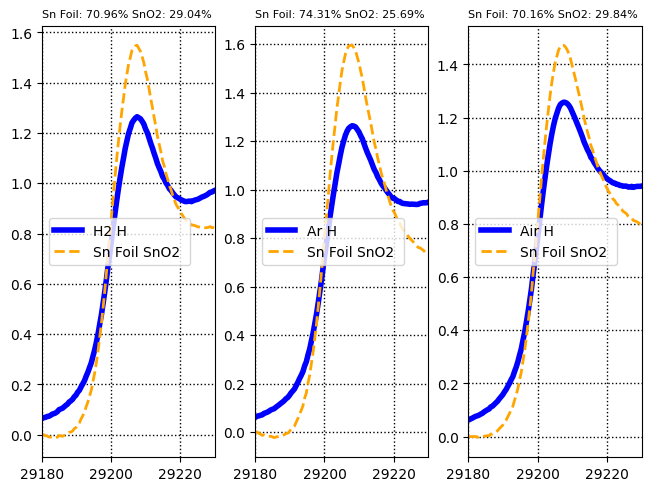

Goodness of LCF fits (R factors)
LCF of H2 H R Factor:	 0.0025
LCF of Ar H R Factor:	 0.0046
LCF of Air H R Factor:	 0.0030


In [6]:
# get parameters for the second lcf operation

reference_standard = operations_data['task_list'][1]['variables']["reference_standard"]

lcf_component_names = operations_data['task_list'][1]['variables']['lcf_components']
lcf_group_names = operations_data['task_list'][1]['variables']['lcf_groups']

lower_limit = operations_data['task_list'][1]['variables']['lower_limit']
upper_limit = operations_data['task_list'][1]['variables']['upper_limit']


# Create a List of groups to use as components 
lcf_components = {}
for a_component in lcf_component_names :
    lcf_components[a_component] = snkedge_data[a_component]

#create a list of groups to hold the results of the lcf                          
results = []

# do lcf on each of the groups listed
for a_group in lcf_group_names:
    min_lim = lcf_components[reference_standard].e0 + lower_limit
    max_lim = lcf_components[reference_standard].e0 + upper_limit
    lcf_result = athenamgr.lcf_group(snkedge_data[a_group], 
                                     list(lcf_components.values()), 
                                     fit_limits=[min_lim, max_lim])
    lcf_result.label = "LCF of "+ a_group
    results.append([snkedge_data[a_group],lcf_result])

# plot the lcf results
custom_plots.compare_lcf_plot(results)
plt.show()
    
print("Goodness of LCF fits (R factors)")

for a_result in results:
        print (a_result[1].label + " R Factor:\t", "%.4f" % a_result[1].rfactor)

# 3. Save data
The saving process is also divided in two steps, first the data is saved into an athena project, and then the corresponding  metadata is saved in a json file.

## 3.1 Save Athena project
Store processed data in an Athena project file

In [7]:
# get parameters for the third operation 
# define the location of the output files
out_prefix =  operations_data['task_list'][2]['variables']["out_prefix"]
out_location = operations_data['task_list'][2]['variables']["out_location"]


# create a new output dir if it does not exist
out_dir = athenamgr.set_out_dir(out_prefix,out_location)
out_file = Path(out_dir, out_prefix+"_lcf.prj")
# save the data to that output dir
athenamgr.save_groups(snkedge_data.values(), out_file)
print("processed data saved to:", str(out_file))

processed data saved to: ..\outputs\PtSn_KEdge\PtSn_KEdge_lcf.prj


## 3.2 Save mappings
Store the metadata required to support further processing.

In [8]:
# define the location of the output files
# save a json file with the results
# using the structure of the initial data mappings
out_mappings = copy.deepcopy(json_metadata)

new_mappings = {}
file_mappings = []
for a_sample in snkedge_data:
    file_mappings.append ({'group':a_sample, 
                           'group_name':a_sample.replace(" ","_"),
                           'file_name': str(out_file).replace("\\","/")})

new_mappings['data_path'] = str(out_dir).replace("\\","/")
new_mappings['data_type'] = "athena"
new_mappings['file_mappings'] = file_mappings

out_mappings['data_mapping'].append(new_mappings)


json_data = json.dumps(out_mappings, indent=4)
out_file_name = Path(out_dir, out_prefix+'_lcf.json')
with open(out_file_name, 'w', encoding='utf-8') as f:
    f.write(json_data)
print("Mapping data saved to:", str(out_file_name))


Mapping data saved to: ..\outputs\PtSn_KEdge\PtSn_KEdge_lcf.json


## References

The data used in this example is part of the supporting data for:

Huang, Haoliang, Nassr, Abu Bakr Ahmed Amine, Celorrio, Verónica, Taylor, S. F. Rebecca, Puthiyapura, Vinod Kumar, Hardacre, Christopher, Brett, Dan J. L., Russell, Andrea E. (2018) Effects of heat treatment atmosphere on the structure and activity of Pt3Sn nanoparticle electrocatalysts: a characterisation case study. Faraday Discussions. V. 208. pp. 555-573. DOI:[10.1039/c7fd00221a](http://doi.org/10.1039/c7fd00221a).

The data used for reproducing the results was published in the Southampton Instituional Repository DOI: [10.5258/SOTON/D0408](https://eprints.soton.ac.uk/421798/), with the name Xray_data.zip - Dataset.